# Alberto Cardoso
## Minhas descobertas ao explorar os dados

A análise prévia e a depuração do DataSet foram muitíssimo importantes neste projeto:
- partimos de uma amostra com 9742 filmes e após a eliminação dos outliers (filmes com menos de 50 votos) chegamos a apenas 450 filmes;
- organizar as variáveis tornou as análises mais simples. Separamos a variável título em título e ano de lançamento e criamos 19 colunas, uma para cada um dos gêneros;
- também foram criadas novas variáveis relevantes para o estudo: `nota_media` e `total_de_votos`.

A análise visual, com o apoio de diversos recursos gráficos (seaborn, pyplot), norteou o projeto, fornecendo _insights_ para estudos mais detalhados, utilizando métodos Estatísticos. Aliás, ter uma boa base em Estatística mostrou-se um requisito importante para este projeto de Data Science.

Na comparação entre os gêneros `Action` e `War`, observamos que `Action` possuía mais votos em termos absolutos, todavia, `War` apresentou maior popularidade média. Vale ressaltar que precisamos estar atentos ao fato de que foram comparadas amostras de tamanhos bem distintos: 164 filmes de `Action` e apenas 19 filmes de `War`.

Na comparação do total de votos entre os gêneros `Horror` e `Adventure`, a análise visual dos boxplots indicou preferência pelo 2º gênero, o que foi confirmado com os testes estatísticos. Já na comparação da nota média entre os mesmos gêneros, a análise visual não foi conclusiva e os testes estatístícos tampouco tiveram informações suficientes para chegar a um veredito.

O ponto mais difícil do projeto talvez tenha sido a análise dos coeficientes de correlação. Em nenhum dos estudos realizados, foram obtidas correlações elevadas próximas, de 1 ou -1. Além disso, visualmente não ficou claro que se tratavam de correlações lineares.

Por fim, nas visualizações extras, foram obtidos resultados interessantes quando o período de análise foi reduzido, tendo como início o ano de 1995, o que nos levou à tese de que o DataSet do MovieLens talvez precise ser reconsiderado num estudo mais rigoroso, pois a tendência ao longo dos anos é de menor participação dos usuários, o que compromete por demais os estudos de Data Science.

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

Ver célula anterior.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
filmes['nota_media'] = notas.groupby('filmeId').mean()['nota']

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme

notas.groupby('filmeId').count()['nota']

filmeId
1         215
2         110
3          52
4           7
5          49
6         102
7          54
8           8
9          16
10        132
11         70
12         19
13          8
14         18
15         13
16         82
17         67
18         20
19         88
20         15
21         89
22         36
23         16
24         28
25         76
26         13
27          9
28         11
29         38
30          3
         ... 
188189      1
188301      3
188675      1
188751      1
188797      1
188833      1
189043      1
189111      1
189333      2
189381      1
189547      1
189713      1
190183      1
190207      1
190209      1
190213      1
190215      1
190219      1
190221      1
191005      1
193565      1
193567      1
193571      1
193573      1
193579      1
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [12]:
# solução para criar a nova coluna e filtrar os filmes

filmes['total_de_votos'] = notas.groupby('filmeId').count()['nota']
filmes = filmes[filmes['total_de_votos'] >= 50]

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

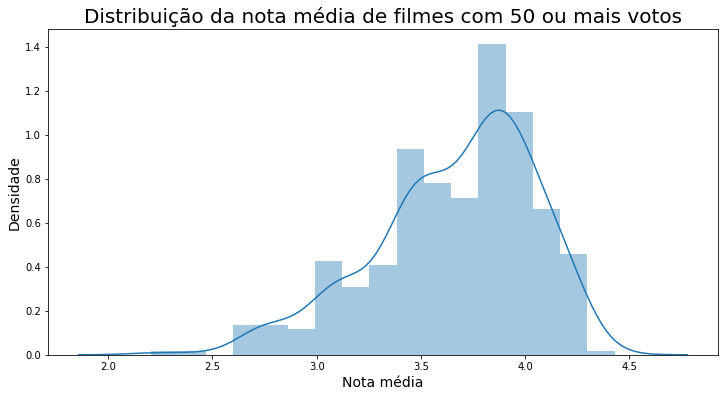

In [14]:
# solução histograma

ax = sns.distplot(filmes['nota_media'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da nota média de filmes com 50 ou mais votos', fontsize=20)
ax.set_xlabel('Nota média', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

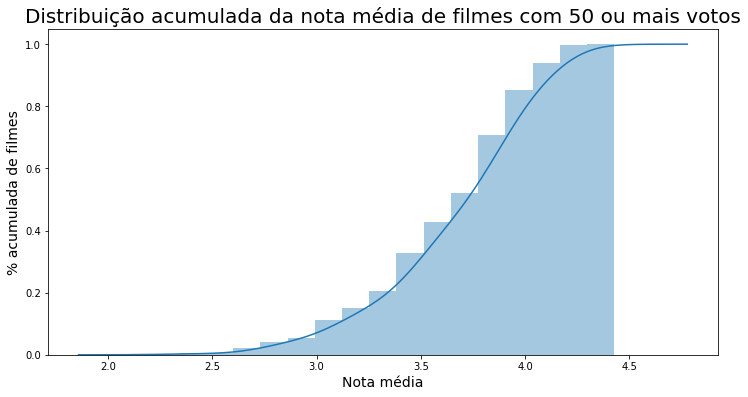

In [15]:
# solução cumulativa

ax = sns.distplot(filmes['nota_media'], hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição acumulada da nota média de filmes com 50 ou mais votos', fontsize=20)
ax.set_xlabel('Nota média', fontsize=14)
ax.set_ylabel('% acumulada de filmes', fontsize=14)
ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

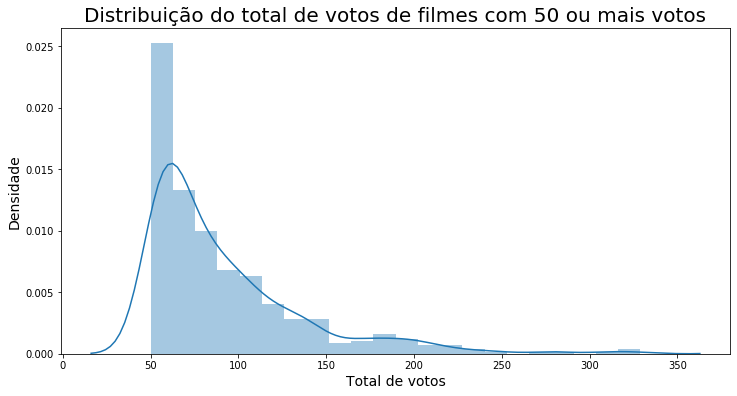

In [16]:
# solução histograma

ax = sns.distplot(filmes['total_de_votos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição do total de votos de filmes com 50 ou mais votos', fontsize=20)
ax.set_xlabel('Total de votos', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

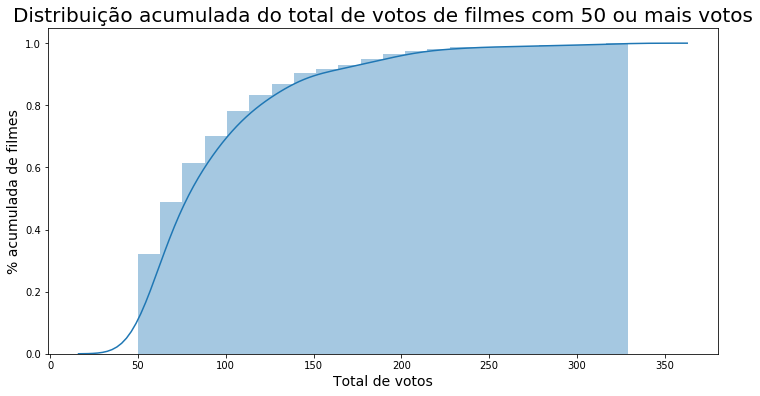

In [17]:
# solução cumulativa

ax = sns.distplot(filmes['total_de_votos'], hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição acumulada do total de votos de filmes com 50 ou mais votos', fontsize=20)
ax.set_xlabel('Total de votos', fontsize=14)
ax.set_ylabel('% acumulada de filmes', fontsize=14)
ax

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [96]:
# solução

# Utilizamos quantil de 80%, ou seja, 20% das notas acima desse valor
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `gêneros` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por gênero

- Para cada um dos gêneros você deve agrupar o número de filmes
- Ordene as barras, na esquerda o gênero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

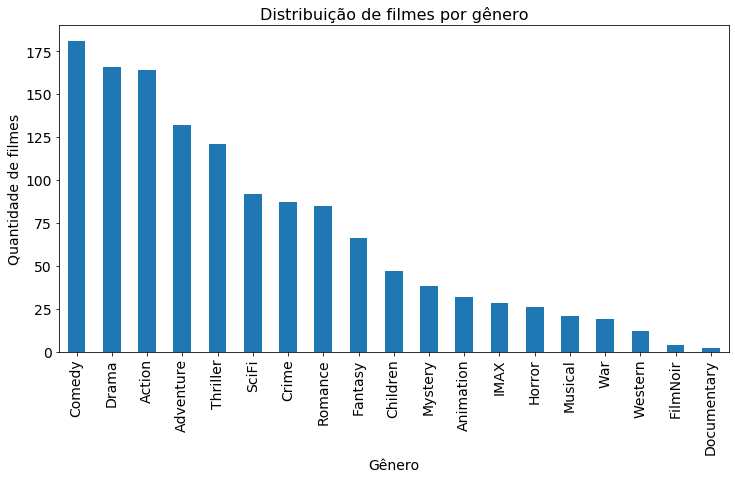

In [97]:
# solução

%matplotlib inline
import matplotlib.pyplot as plt

numero_de_filmes_por_genero = generos.sum()
fig = numero_de_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), fontsize=14)
fig.set_title('Distribuição de filmes por gênero', {'fontsize': 16})
fig.set_ylabel('Quantidade de filmes', {'fontsize': 14})
fig.set_xlabel('Gênero', {'fontsize': 14})
fig

## Pergunta: Quais são os 5 gêneros com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução

numero_de_filmes_por_genero.sort_values(ascending=False)
top5_generos_em_quantidade_de_filmes = numero_de_filmes_por_genero.sort_values(ascending=False)[0:5]

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por gênero

- o código que gera os votos por gênero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por gênero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão

# Categorias ordenadas
votos_por_genero_por_filme.sum().sort_values(ascending=False)

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

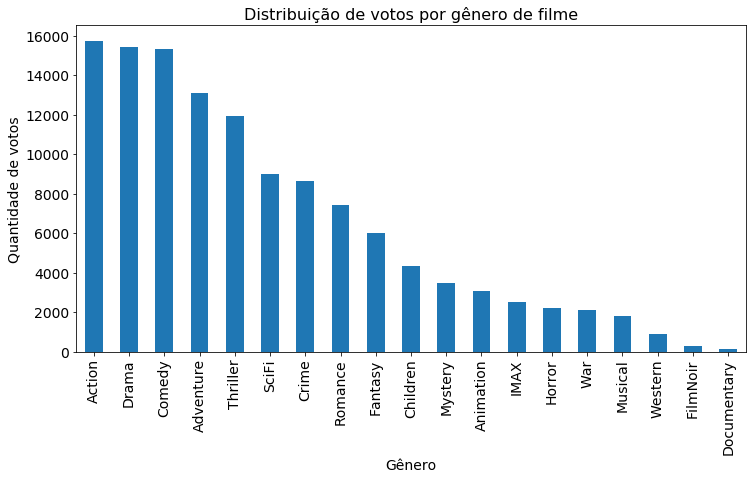

In [98]:
# solução

# Visualização por gênero
fig = votos_por_genero_por_filme.sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), fontsize=14)
fig.set_title('Distribuição de votos por gênero de filme', {'fontsize': 16})
fig.set_ylabel('Quantidade de votos', {'fontsize': 14})
fig.set_xlabel('Gênero', {'fontsize': 14})
fig

## Pergunta: votos por filme por gênero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele gênero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse gênero, foram 100 votos por filme nesse gênero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por gênero
- Calcule o número de votos por gênero dividido pelo total de filmes por gênero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solução código

popularidade_media = votos_por_genero_por_filme.sum()/numero_de_filmes_por_genero
popularidade_media.sort_values(ascending=False)

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

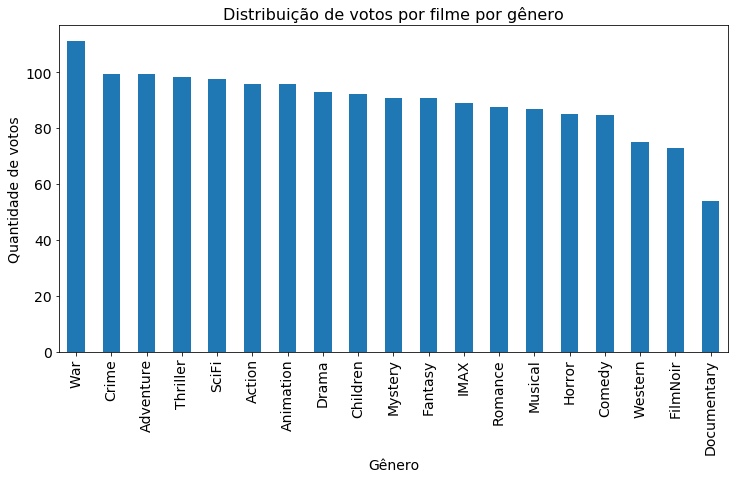

In [99]:
# solução com visualização 

fig = popularidade_media.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), fontsize=14)
fig.set_title('Distribuição de votos por filme por gênero', {'fontsize': 16})
fig.set_ylabel('Quantidade de votos', {'fontsize': 14})
fig.set_xlabel('Gênero', {'fontsize': 14})
fig

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os gêneros `Action` e `War`?

### Solução (texto livre):

Considerando as 3 últimas visualizações, temos os seguintes resultados.

Gênero `Action`:
- Número de filmes por gênero: 3º colocado (164 filmes)
- Número de votos por gênero: 1º colocado (15734 votos)
- Popularidade média: 6º colocado (95.94 votos por filme)
	
	
Gênero `War`:
- Número de filmes por gênero: 16º colocado (19 filmes)
- Número de votos por gênero: 15º colocado (2113 votos)
- Popularidade média: 1º colocado (11.21 votos por filme)

Observa-se que o gênero `Action` permaneceu nas primeiras posições em todas as visualizações, com uma pequena queda no ranking de Popularidade média.

Já o gênero `War`, que ocupava as últimas posições nas duas primeiras visualizações, deu um salto para o 1º lugar de Popularidade média.

Numa análise preliminar, isto poderia indicar um maior engajamento (maior predisposição a votar) dos espectadores do gênero `War`. No entanto, com base nas informações e estudos que temos até este ponto do Notebook Jupyter, isto ainda não pode ser afirmado categoricamente.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

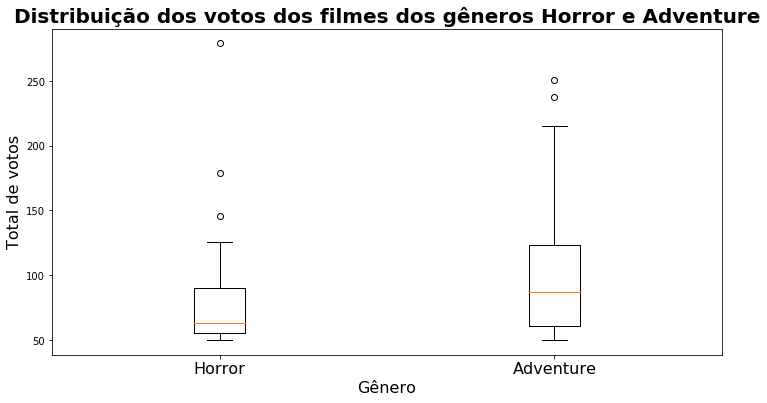

In [104]:
# solução:

plt.figure(figsize=(12,6))
plt.boxplot([filmes.query('Horror == 1')['total_de_votos'], filmes.query('Adventure == 1')['total_de_votos']],
            labels=['Horror','Adventure'])
plt.title('Distribuição dos votos dos filmes dos gêneros Horror e Adventure', fontweight='bold', size = 20)
plt.ylabel("Total de votos", size = 16)
plt.xlabel("Gênero", size = 16)
plt.xticks(size=16)
plt.show()

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

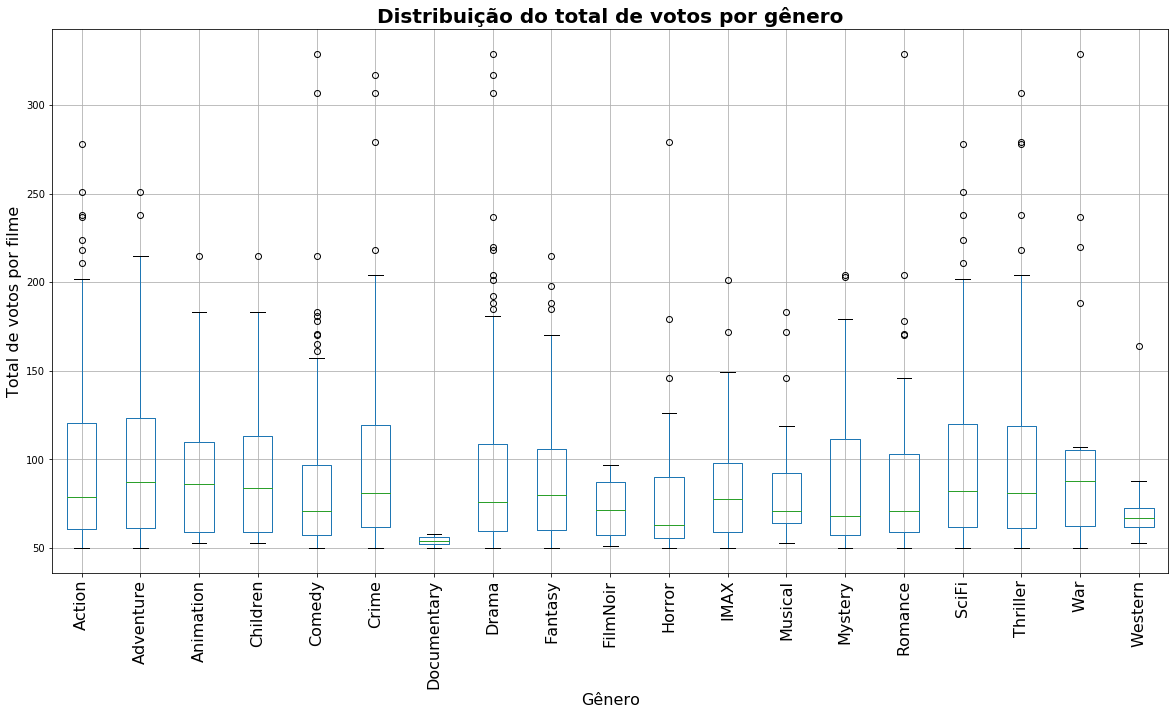

In [105]:
dist_votos=pd.DataFrame(index=filmes.index)
for i in range(0,len(generos.columns)):
    dist_votos[generos.columns[i]]=(filmes[filmes[generos.columns[i]]==1].total_de_votos)

plt.figure(figsize=(20,10))
dist_votos.boxplot()
plt.title('Distribuição do total de votos por gênero', fontweight='bold', size = 20)
plt.ylabel("Total de votos por filme", size = 16)
plt.xlabel("Gênero", size = 16)
plt.xticks(rotation=90, size=16)
plt.show()

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
Com base na análise visual realizada até este ponto do Notebook Jupyter, sugeriria o gênero `Adventure`, considerando que:
- `Adventure` ocupa a 4ª posição no total de filmes, com 132 filmes, enquanto `Horror` está na 14ª posição com apenas 26 filmes. Esta maior oferta de `Adventure` já é um primeiro indicativo de que o gênero possa ser lucrativo para a indústria do cinema.
- `Adventure` ocupa a 4ª posição no total de votos, com 13117 votos, enquanto `Horror` está na 14ª posição com 2215 votos. Este poderia ser um indicativo das bilheterias do gênero como um todo. Maiores bilheterias, em princípio, deveriam gerar mais votos.
- Com relação à popularidade, que podemos comparar a um certo engajamento dos espectadores (bilheteria por filme), `Adventure` está na 3º posição com 99.37 votos por filme e `Horror` na 15ª posição com 85.19 votos por filme. Essa diferença é bem visível no boxplot.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

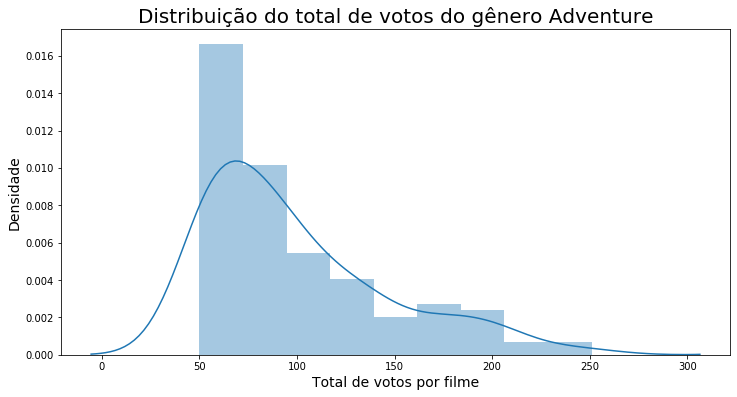

In [32]:
# solução histograma de aventura

ax = sns.distplot(filmes.query('Adventure == 1')['total_de_votos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição do total de votos do gênero Adventure', fontsize=20)
ax.set_xlabel('Total de votos por filme', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

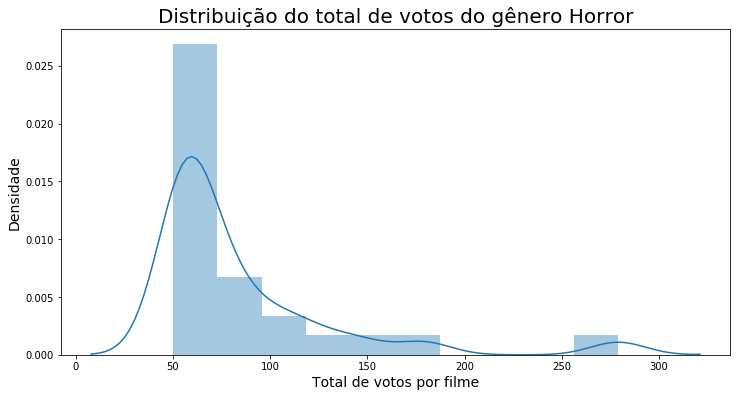

In [33]:
# solução histograma de horror

ax = sns.distplot(filmes.query('Horror == 1')['total_de_votos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição do total de votos do gênero Horror', fontsize=20)
ax.set_xlabel('Total de votos por filme', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

In [34]:
# solução teste de normalidade ou justificativa para não utilizá-lo

# Utilizaremos o normaltest para teste de normalidade
# Hipótese nula: dados vêm de uma distribuição normal
# p-value < 0.05: não é uma distribuição normal

from scipy.stats import normaltest

# normaltest para Adventure
_, p = normaltest(filmes.query('Adventure == 1')['total_de_votos'])
print('p-value de Adventure:', p)

# normaltest para Horror
_, p = normaltest(filmes.query('Horror == 1')['total_de_votos'])
print('p-value de Horror:', p)

p-value de Adventure: 5.987863006199139e-06
p-value de Horror: 1.2786148884334685e-07


In [35]:
# solução com o teste desejado

# Como as distribuições não são normais, utilizaremos o teste Ranksums
# Hipótese nula: as 2 amostras vieram da mesma distribuição

from scipy.stats import ranksums
_, p = ranksums(filmes.query('Adventure == 1')['total_de_votos'],filmes.query('Horror == 1')['total_de_votos'])
p

0.04782366231999856

### Solução (explique sua conclusão):

Primeiramente, com o normaltest, verificamos que nenhuma das distribuições era normal. Portanto, não poderíamos utilizar T-Test ou Z-Test, o que nos levou ao ranksums.

Como o valor de p do ranksums (0.0478) foi inferior a 0.05, embora bem próximo, descartamos a hipótese nula, ou seja, `Adventure` possui valores superiores a `Horror`.

Portanto, a recomendação pelo gênero `Adventure` permanece.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

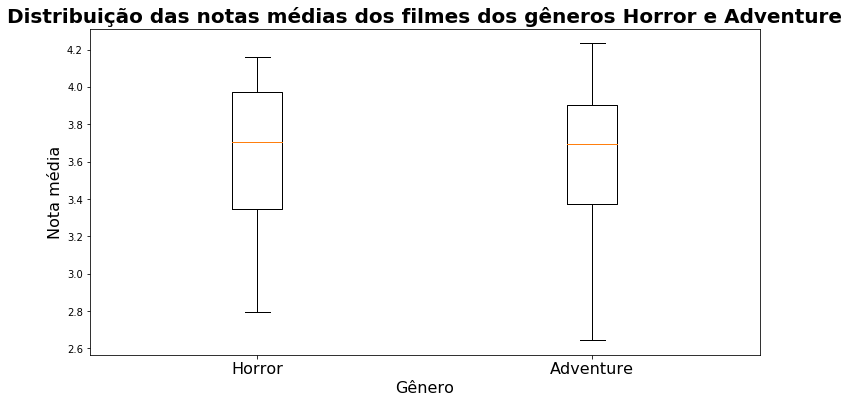

In [107]:
# solução:

plt.figure(figsize=(12,6))
plt.boxplot([filmes.query('Horror == 1')['nota_media'], filmes.query('Adventure == 1')['nota_media']],
            labels=['Horror','Adventure'])
plt.title('Distribuição das notas médias dos filmes dos gêneros Horror e Adventure', fontweight='bold', size = 20)
plt.ylabel("Nota média", size = 16)
plt.xlabel("Gênero", size = 16)
plt.xticks(size=16)
plt.show()

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Visualmente, com base no boxplot, é muito difícil selecionar a distribuição de maior nota média. Recomendaria `Horror` porque apresenta mediana e 3º quartil ligeiramente superiores.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

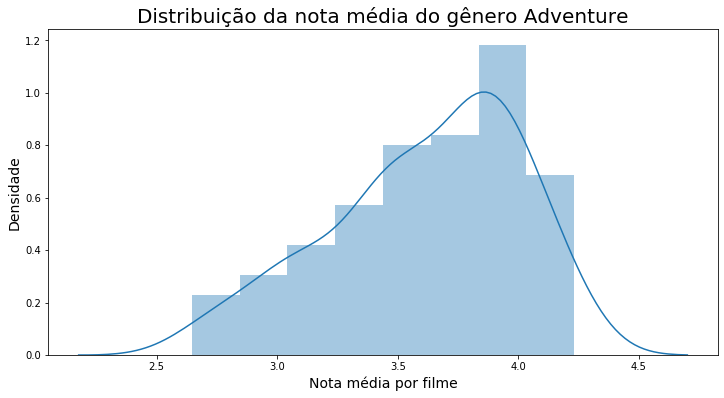

In [37]:
# solução histograma de aventura

ax = sns.distplot(filmes.query('Adventure == 1')['nota_media'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da nota média do gênero Adventure', fontsize=20)
ax.set_xlabel('Nota média por filme', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

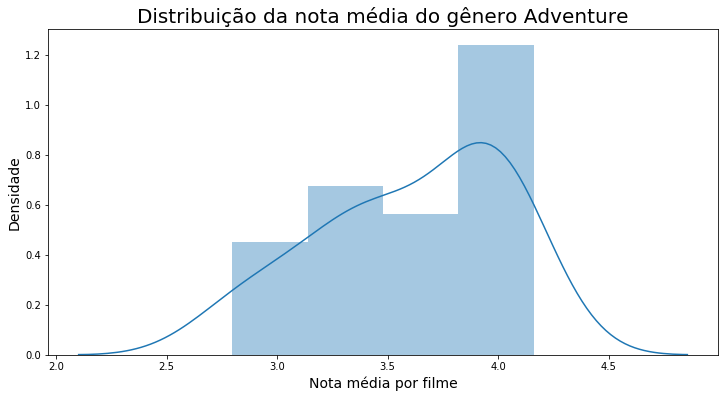

In [38]:
# solução histograma de horror

ax = sns.distplot(filmes.query('Horror == 1')['nota_media'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da nota média do gênero Adventure', fontsize=20)
ax.set_xlabel('Nota média por filme', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

In [39]:
# solução teste de normalidade ou justificativa para não utilizá-lo

# normaltest para Adventure
_, p = normaltest(filmes.query('Adventure == 1')['nota_media'])
print('p-value de Adventure:', p)

# normaltest para Horror
_, p = normaltest(filmes.query('Horror == 1')['nota_media'])
print('p-value de Horror:', p)

p-value de Adventure: 0.012835697582553224
p-value de Horror: 0.21186284682483916


In [95]:
# solução com o teste desejado

# Como a distribuição Adventure não é normal, utilizaremos o teste Ranksums
# Hipótese nula: as 2 amostras vieram da mesma distribuição

from scipy.stats import ranksums
_, p = ranksums(filmes.query('Adventure == 1')['nota_media'],filmes.query('Horror == 1')['nota_media'])
p

0.8310397344212459

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:

Primeiramente, com o normaltest, verificamos que a distribuição `Adventure` não era normal. Portanto, não poderíamos utilizar T-Test ou Z-Test, o que nos levou ao ranksums.

Como o valor de p do ranksums (0.8310) foi superior a 0.05, não podemos descartar a hipótese nula, ou seja, não temos dados suficientes para essa análise, não é possível dizer qual dos gêneros teria maior sucesso de crítica.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

Recomendaria o gênero `Adventure` pelas seguintes razões:
- Com relação à crítica, os testes demonstraram não ser possível escolher um deles, ou seja, tivemos um empate.
- Já com relação à popularidade, os testes demonstraram a superioridade do gênero `Adventure`.

## Pergunta: Quais são os top 5 filmes dos 2 gêneros mais assistidos?

- utilize os 2 gêneros mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [41]:
votos_por_genero = votos_por_genero_por_filme.sum().sort_values(ascending = False)

In [42]:
# solução: calculando os 2 gêneros mais votados

votos_por_genero.head(2)

Action    15734.0
Drama     15445.0
dtype: float64

In [43]:
# solução: encontrando os top 5 filmes desses gêneros

top5_filmes_de_action_ou_drama = filmes.query("Action == 1 | Drama == 1").sort_values("nota_media", ascending = False).head()
top5_filmes_de_action_ou_drama[['titulo', 'nota_media', 'total_de_votos', 'Action', 'Drama']]

,titulo,nota_media,total_de_votos,Action,Drama
filmeId,,,,,
318,"Shawshank Redemption, The (1994)",4.429022,317.0,0,1
858,"Godfather, The (1972)",4.289062,192.0,0,1
2959,Fight Club (1999),4.272936,218.0,1,1
1276,Cool Hand Luke (1967),4.271930,57.0,0,1
1221,"Godfather: Part II, The (1974)",4.259690,129.0,0,1


## Pergunta: Quais são os 2 gêneros com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [44]:
# solução

correlacao_entre_generos_e_nota_media = filmes.corr()['nota_media'][generos.columns].sort_values(ascending = False)
print(correlacao_entre_generos_e_nota_media, '\n')

print("Os 2 gêneros com maior valor de correlação com a nota média são: {} e {}."
     .format(correlacao_entre_generos_e_nota_media.head(2).index[0], correlacao_entre_generos_e_nota_media.head(2).index[1]))

print("Os 2 gêneros com menor valor de correlação com a nota média são: {} e {}."
     .format(correlacao_entre_generos_e_nota_media.tail(2).index[0], correlacao_entre_generos_e_nota_media.tail(2).index[1]))

Drama          0.277662
Crime          0.190220
Mystery        0.129914
War            0.125615
FilmNoir       0.081766
IMAX           0.064931
Animation      0.043071
Documentary   -0.003486
Musical       -0.008529
Thriller      -0.016782
Fantasy       -0.020986
Children      -0.030360
Horror        -0.033877
Western       -0.059642
Romance       -0.072002
Adventure     -0.079985
SciFi         -0.136717
Action        -0.154089
Comedy        -0.256005
Name: nota_media, dtype: float64 

Os 2 gêneros com maior valor de correlação com a nota média são: Drama e Crime.
Os 2 gêneros com menor valor de correlação com a nota média são: Action e Comedy.


## Pergunta: Quais são os 2 gêneros com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [45]:
# solução

correlacao_entre_generos_e_total_de_votos = filmes.corr()['total_de_votos'][generos.columns].sort_values(ascending = False)
print(correlacao_entre_generos_e_total_de_votos, '\n')

print("Os 2 gêneros com maior valor de correlação com o total de votos são: {} e {}."
     .format(correlacao_entre_generos_e_total_de_votos.head(2).index[0],
             correlacao_entre_generos_e_total_de_votos.head(2).index[1]))

print("Os 2 gêneros com menor valor de correlação com o total de votos são: {} e {}."
     .format(correlacao_entre_generos_e_total_de_votos.tail(2).index[0],
             correlacao_entre_generos_e_total_de_votos.tail(2).index[1]))


Adventure      0.104380
War            0.087999
Thriller       0.085525
Crime          0.079766
Action         0.066239
SciFi          0.063802
Animation      0.023442
Drama          0.018779
Children       0.001764
Mystery       -0.007051
Fantasy       -0.009976
IMAX          -0.016285
Musical       -0.024741
Horror        -0.036132
FilmNoir      -0.039408
Romance       -0.045427
Documentary   -0.055010
Western       -0.060789
Comedy        -0.128527
Name: total_de_votos, dtype: float64 

Os 2 gêneros com maior valor de correlação com o total de votos são: Adventure e War.
Os 2 gêneros com menor valor de correlação com o total de votos são: Western e Comedy.


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

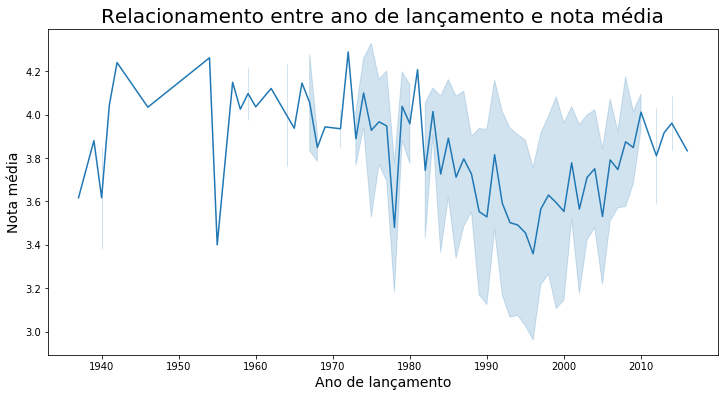

In [46]:
# solução

# O lineplot foi configurado para exibir o desvio padrão em vez do intervalo de confiança (ci='sd')
ax = sns.lineplot(x='ano_de_lancamento', y='nota_media', data=filmes, ci='sd')
ax.figure.set_size_inches(12, 6)
ax.set_title('Relacionamento entre ano de lançamento e nota média', fontsize=20)
ax.set_xlabel('Ano de lançamento', fontsize=14)
ax.set_ylabel('Nota média', fontsize=14)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [47]:
# solução (código)

filmes.corr()['ano_de_lancamento']['nota_media']

-0.1591455520444448

### Solução (explicação):

A partir da correlação de -0.1591 entre `ano_de_lancamento` e `nota_media` podemos chegar às seguintes conclusões:
- por ser um valor negativo, anos maiores levariam a notas médias menores;
- no entanto, por ser um valor próximo a 0 (zero), a correlação entre as variáveis é baixa, ou seja, as variáveis não dependem uma da outra.

Na análise visual do lineplot, que traçou o desvio padrão para cada ano, podemos observar baixíssima dispersão antes da década de 1970 e grande dispersão a partir de então. De maneira simplificada, podemos dizer que a baixa dispersão dos filmes antigos é causada principalmente por conta dos poucos filmes disponíveis na amostra.

Da mesma forma que no início deste Notebook Jupyter descartamos os filmes com poucas notas, talvez fosse necessário, para uma análise mais rigorosa, descartar os anos com poucos filmes.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

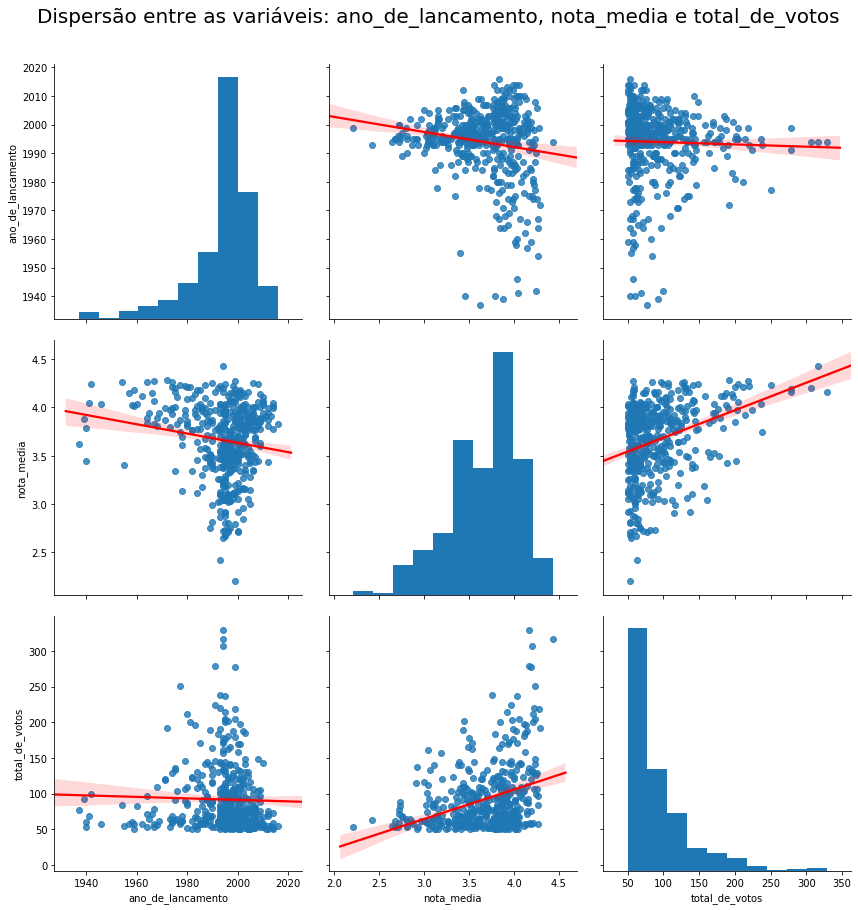

In [48]:
# solução

infos = ['ano_de_lancamento','nota_media','total_de_votos']
ax = sns.pairplot(filmes,y_vars=infos,x_vars=infos, kind='reg', height=4, plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle('Dispersão entre as variáveis: ano_de_lancamento, nota_media e total_de_votos', fontsize=20, y=1.05)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

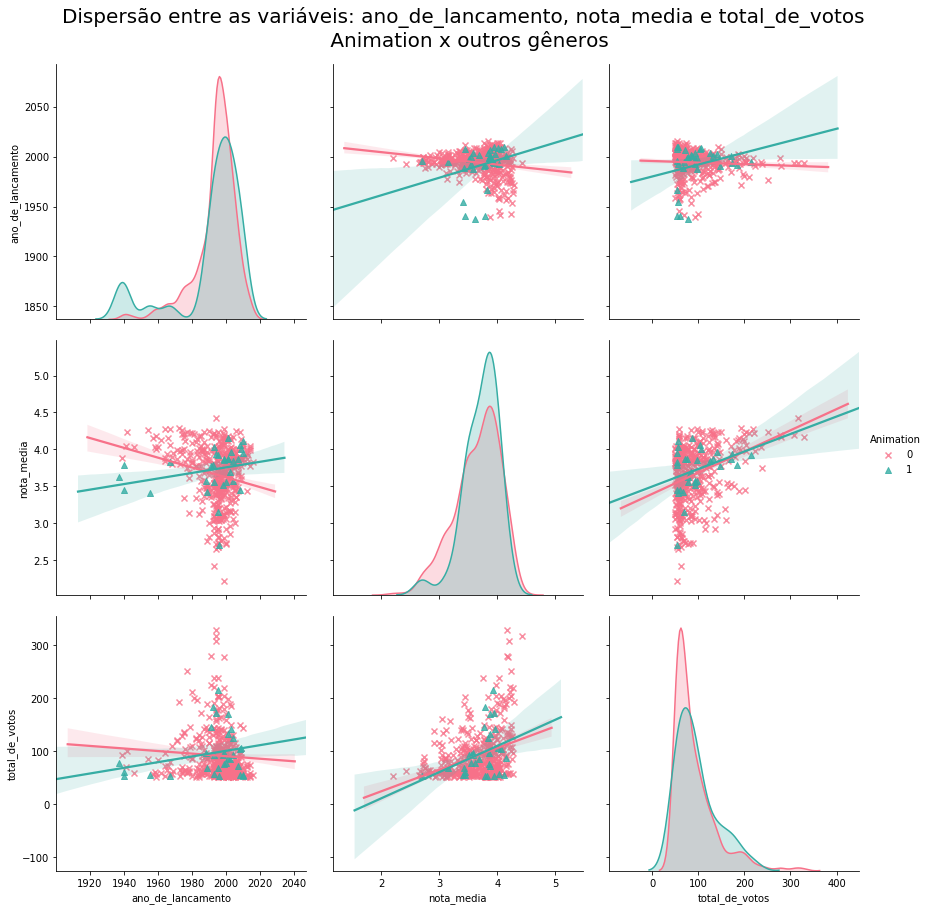

In [108]:
ax = sns.pairplot(filmes,y_vars=infos,x_vars=infos, kind='reg', height=4, 
                  hue="Animation", palette='husl',
                 markers=['x','^'])
ax.fig.suptitle('Dispersão entre as variáveis: ano_de_lancamento, nota_media e total_de_votos \n Animation x outros gêneros',
                fontsize=20, y=1.05)
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

- Nos filmes de `Animation`, as variáveis `ano_de_lancamento` e `nota_media` apresentam uma correlação baixa, mas positiva, o que significa que filmes mais recentes tendem a ter notas médias maiores. No entanto, devido aos poucos filmes antigos e a muitos outliers por volta do ano 2000, não é possível afirmar com certeza que a correlação seja linear.
- Nos filmes de `Animation`, para as variáveis `ano_de_lancamento` e `total_de_votos`, a análise é semelhante à anterior: correlação baixa, mas positiva, o que significa que há mais votos para os filmes mais recentes. Novamente, não é possível garantir que a correlação seja linear.
- Para os demais gêneros, temos os mesmos problemas de `Animation`: poucos filmes antigos e outliers em torno do ano 2000. Para a `nota_media`, a correlação é negativa, ou seja, os filmes mais recentes apresentam notas menores. Já com relação ao total de votos, a correlação é negativa, mas muito próxima de 0 (zero), ou seja, as variáveis não dependem uma da outra. Da mesma forma que para os filmes de `Animation`, com base nos dados apresentados, não é possível garantir que a correlação seja linear.
- Pode-se levantar a hipótese de que o gênero `Animation`, graças à evolução dos recursos tecnológicos, apresenta filmes cada vez melhores, levando um público cada vez maior aos cinemas, roubando audiência dos demais gêneros.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

### 1ª Visualização: comportamento das variáveis a partir do ano de lançamento de 1995

Ao analisarmos os diversos DataSets do MovieLens (https://grouplens.org/datasets/movielens/), identificamos que foram criados com informações a partir dos anos de 1995 e 1996.

Para esta primeira visualização, definimos o ano de lançamento de 1995 como ano inicial da análise, ou seja, serão considerados apenas os filmes lançados desde a criação dos DataSets. Queremos avaliar se haverá mudança no comportamento das variáveis em relação à série completa (analisada anteriormente).

In [77]:
# Criação de DataFrame com filmes lançados a partir de 1995

filmes_desde_1995 = filmes.query('ano_de_lancamento >= 1995')

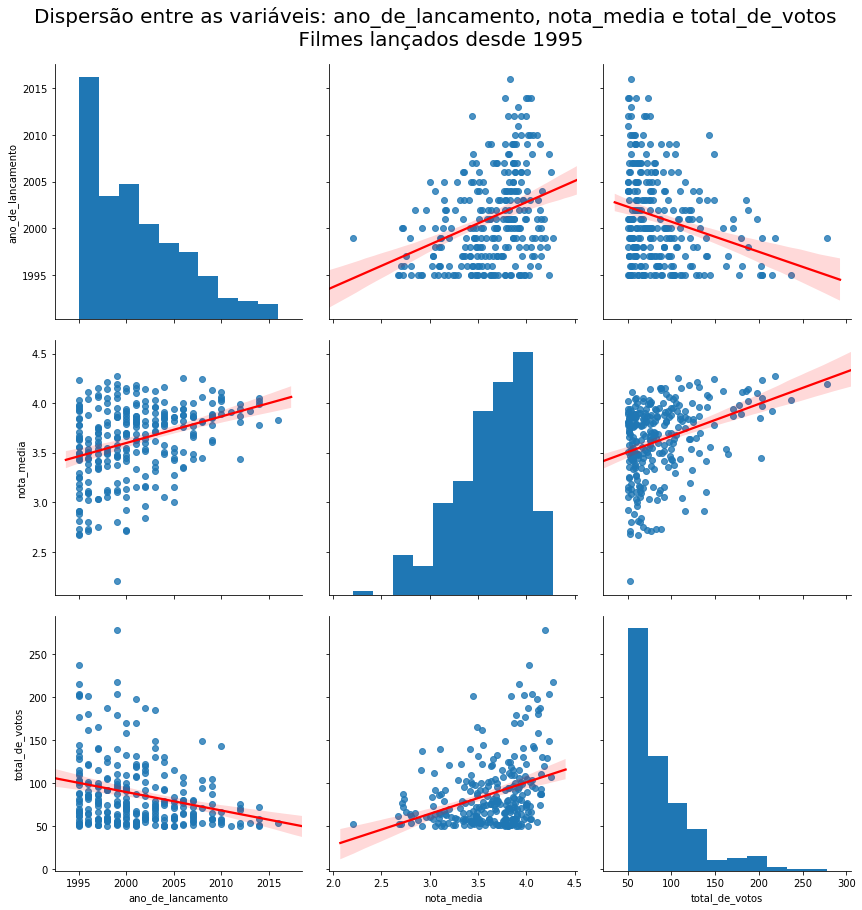

In [87]:
# Dispersão entre as variáveis

ax = sns.pairplot(filmes_desde_1995,y_vars=infos,x_vars=infos, kind='reg', height=4, plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle('Dispersão entre as variáveis: ano_de_lancamento, nota_media e total_de_votos \n Filmes lançados desde 1995',
                fontsize=20, y=1.05)
ax

In [90]:
# Fator de correlação entre ano_de_lancamento e nota_media

filmes_desde_1995.corr()['ano_de_lancamento']['nota_media']

0.34860268983807197

### Conclusão da 1ª visualização

Considerando as três variáveis (`ano_de_lancamento`, `nota_media` e `total_de_votos`), observamos uma inversão na correlação entre as variáveis `ano_de_lancamento` e `nota_media`, que passou de -0.1591 para 0.3486, ou seja, os filmes mais recentes passaram a ter notas maiores, embora ainda não se possa afirmar que a correlação seja linear.

Analisando a distribuição de filmes por ano de lançamento, observa-se que o pico ocorreu justamente no ano de início dos DataSets do MovieLens: 1995. Nos anos seguintes, houve um grande declínio, chegando a apenas 1 filme em 2016. Também houve declínio no total de votos por ano de lançamento.

Estes indicativos podem ser um sinal de que a fonte do DataSet (MovieLens) pode estar sendo comprometida. A cada ano, menos filmes são avaliados e os avaliados recebem cada vez menos votos. Isto pode ser explicado pela relevância de outro site de análise de filmes, o IMDB, que está entre os sites mais visitados do mundo, como pode ser visto neste verbete da Wikipédia: https://en.wikipedia.org/wiki/List_of_most_popular_websites

Na comparação direta entre os sites, em SimilarWeb (https://www.similarweb.com/pt/website/movielens.org?competitors=imdb.com) a diferença é bastante evidente. Obviamente, são sites com propósitos distintos, no entanto, dependem de públicos semelhantes (usuários interessados em filmes). Para esses usuários, pode ser uma experiência mais gratificante participar da comunidade do IMDB do que do MovieLens.

Com cada vez menos usuários participantes, os DataSets do MovieLens precisam ser repensados, pois, como observamos neste Notebook Jupyter, a redução na quantidade de filmes compromete as análises.

### 2ª Visualização: comportamento dos filmes de `Animation` a partir do ano de lançamento de 1995

Na 2ª visualização, vamos avaliar se houve alteração no comportamento dos filmes de `Animation` lançados a partir do ano de 1995 em relação à série completa.

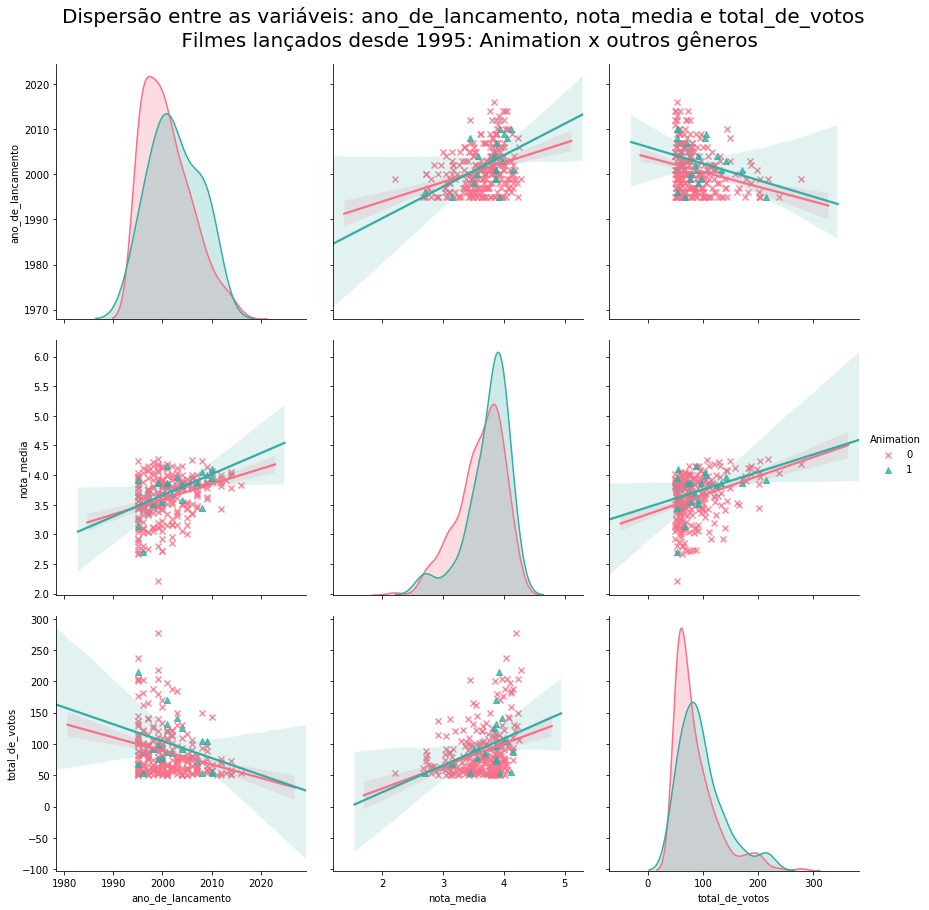

In [93]:
# Dispersão entre as variáveis, comparando Animation e demais gêneros

ax = sns.pairplot(filmes_desde_1995,y_vars=infos,x_vars=infos, kind='reg', height=4, 
                  hue="Animation", palette='husl',
                 markers=['x','^'])
ax.fig.suptitle('Dispersão entre as variáveis: ano_de_lancamento, nota_media e total_de_votos \n Filmes lançados desde 1995: Animation x outros gêneros',
                fontsize=20, y=1.05)
ax

### Conclusão da 2ª visualização

Nesta visualização, observamos que os filmes de `Animation` passam a ter um comportamento muito próximo ao dos filmes dos outros gêneros.

Correlação entre `nota_media` e `ano_de_lancamento`:
- Como houve inversão na correlação dos outros gêneros, ambos os grupos apresentam correlação positiva.

Correlação entre `total_de_votos` e `ano_de_lancamento`:
- Houve inversão na correlação de `Animation` e ambos os grupos apresentam correlação negativa.

Correlação entre `nota_media` e `total_de_votos`:
- Permaneceu a correlação positiva já identificada anteriormente.

Sem entrar no mérito da linearidade ou não das correlações, observa-se que a alteração do período de análise eliminou a diferenciação significativa que havia entre os dois grupos. Vale ainda a discussão sobre a representatividade da amostra fornecida pelo DataSet do MovieLens.